# Complex Networks Applied to the Stock Market
Bruno Nogueira Renzo<br>
brunorenzo6@outlook.com

## Pitch presentation I (code):

#### Introduction: 

The stock market and its data it is a BIG data source to run some Analysis projects.
At this notebook I will be showing the first steps of a Complex Network approach on how to understand this market.

#### Objective: 

The Objective is to compare the movements between multiple Stock Symbols, to see how strong is the correlation among them. Drawning a complex network, where the most correlated stocks are binded together, and the more unique ones are settled farway from the rest of the market. Essentially, diving into a deeper Market Stock Analysis.

In [372]:
api_key='AVJ9ITUPCTDZ87AA'
import numpy

In [373]:
import pandas as pd
import numpy as np

In [374]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.foreignexchange import ForeignExchange

In [375]:
import time

In [5]:
ts = TimeSeries(key=api_key, output_format='pandas')

# Define Symbols List

In [359]:
symbolList=['NIO','AAPL','SRNE','GE','AMD','TSLA','AAL','PTON','BAC','F','WFC','ABEV','DKNG',
'SPCE','NKLA','OXY','VALE','WPX','MU','T','DVN','UAL','PBR','NOK','WKHS','CZR','MRO','CCL','PCG',
'ITUB','BBD','C','MSFT','BYND','PLUG','BA','FB','INTC','XOM','SIRI','UBER','CSCO','SNAP','SLB','CLF','NVDA','ZM','ZNGA',
'BP','DAL','SPWR','NCLH','FCX','TWTR','HAL','NBL','APA','KSS','NLY','JPM','PFE','MGM','VIPS','GOLD','SABR','KO',
'PINS','PENN','SQ','SOGO','CMCSA','VIAC','MS','OPK','AUY','GDRX','COTY','ET','VZ','CVE','CVX','WMT','FSLY','SAN',
'IVZ','VST','SU','KMI','VICI','SIUIF','BMY','JBLU','INFY','NKE','RF','KGC','BABA','HPQ','AG','DIS','VER',
'PE','NOV','GPS','LYG','WMB','RDS-A','MO','EBAY','EOG','HPE','GM','CARR','RKT','JNJ','PYPL','VSLR',
'EQT','WORK','GGB','HL','KR','EQNR','HSBC','GILD','GNW','HST','AGNC','MRK','RTX','MDLZ','PDD','MRNA','KEY',
'WDC','MRVL','SCHW','ROKU','EPD','COP','TSM','BLDP','LI','TJX','PBR-A','RUN','ZTO','BSX','LYFT','JD',
'FHN','XPEV','BB','OKE','CVS','GFI','HBAN','QCOM','V','COG','ERIC','ORCL','PPL','BTG','TPR','AMAT',
'OVV','FITB','IQ','SNOW','LUV','USB','TFC','SPR','TOT','AMCR','WBA','AEO','TEVA']

In [362]:
symbolDic = {} 

for i in symbolList: 
    symbolDic[i] = 0

{'NIO': 0, 'AAPL': 0, 'SRNE': 0, 'GE': 0, 'AMD': 0, 'TSLA': 0, 'AAL': 0, 'PTON': 0, 'BAC': 0, 'F': 0, 'WFC': 0, 'ABEV': 0, 'DKNG': 0, 'SPCE': 0, 'NKLA': 0, 'OXY': 0, 'VALE': 0, 'WPX': 0, 'MU': 0, 'T': 0, 'DVN': 0, 'UAL': 0, 'PBR': 0, 'NOK': 0, 'WKHS': 0, 'CZR': 0, 'MRO': 0, 'CCL': 0, 'PCG': 0, 'ITUB': 0, 'BBD': 0, 'C': 0, 'MSFT': 0, 'BYND': 0, 'PLUG': 0, 'BA': 0, 'FB': 0, 'INTC': 0, 'XOM': 0, 'SIRI': 0, 'UBER': 0, 'CSCO': 0, 'SNAP': 0, 'SLB': 0, 'CLF': 0, 'NVDA': 0, 'ZM': 0, 'ZNGA': 0, 'BP': 0, 'DAL': 0, 'SPWR': 0, 'NCLH': 0, 'FCX': 0, 'TWTR': 0, 'HAL': 0, 'NBL': 0, 'APA': 0, 'KSS': 0, 'NLY': 0, 'JPM': 0, 'PFE': 0, 'MGM': 0, 'VIPS': 0, 'GOLD': 0, 'SABR': 0, 'KO': 0, 'PINS': 0, 'PENN': 0, 'SQ': 0, 'SOGO': 0, 'CMCSA': 0, 'VIAC': 0, 'MS': 0, 'OPK': 0, 'AUY': 0, 'GDRX': 0, 'COTY': 0, 'ET': 0, 'VZ': 0, 'CVE': 0, 'CVX': 0, 'WMT': 0, 'FSLY': 0, 'SAN': 0, 'IVZ': 0, 'VST': 0, 'SU': 0, 'KMI': 0, 'VICI': 0, 'SIUIF': 0, 'BMY': 0, 'JBLU': 0, 'INFY': 0, 'NKE': 0, 'RF': 0, 'KGC': 0, 'BABA': 0, 'HPQ':

178

# Extract and Transform Data

## Extract data from API

* For every stock in symbolDic get_Intraday()
* Rename a few columns
* Create a 'candle' column (close-open).
* Candle column can be seem as the actual sotck movement.

In [704]:
avgList=[]
#symbolList={'AAPL':0,'TSLA':0,'GE':0,'NIO':0,'AMD':0,'AAL':0,'VALE':0,'PBR':0,'ABEV':0}
data={}

for s in symbolDic:
    try:
        data[s], meta_data = ts.get_intraday(symbol=s, interval='1min', outputsize='full')

        data[s].drop(['2. high', '3. low', '5. volume'], axis='columns', inplace=True)
        data[s] = data[s].rename(columns = {'1. open': 'open','4. close': 'close'}, inplace = False)
        data[s] = pd.DataFrame(data=data[s]['close']-data[s]['open'],columns = [s])

        print(s+'-  Downloaded')
    except:
        print(s+'-  Error')
    
    time.sleep(13)


NIO-  Downloaded
AAPL-  Downloaded
SRNE-  Downloaded
GE-  Downloaded
AMD-  Downloaded
TSLA-  Downloaded
AAL-  Downloaded
PTON-  Downloaded
BAC-  Downloaded
F-  Downloaded
WFC-  Downloaded
ABEV-  Downloaded
DKNG-  Downloaded
SPCE-  Downloaded
NKLA-  Downloaded
OXY-  Downloaded
VALE-  Downloaded
WPX-  Downloaded
MU-  Downloaded
T-  Downloaded
DVN-  Downloaded
UAL-  Downloaded
PBR-  Downloaded
NOK-  Downloaded
WKHS-  Downloaded
CZR-  Downloaded
MRO-  Downloaded
CCL-  Downloaded
PCG-  Downloaded
ITUB-  Downloaded
BBD-  Downloaded
C-  Downloaded
MSFT-  Downloaded
BYND-  Downloaded
PLUG-  Downloaded
BA-  Downloaded
FB-  Downloaded
INTC-  Downloaded
XOM-  Downloaded
SIRI-  Downloaded
UBER-  Downloaded
CSCO-  Downloaded
SNAP-  Downloaded
SLB-  Downloaded
CLF-  Downloaded
NVDA-  Downloaded
ZM-  Downloaded
ZNGA-  Downloaded
BP-  Downloaded
DAL-  Downloaded
SPWR-  Downloaded
NCLH-  Downloaded
FCX-  Downloaded
TWTR-  Downloaded
HAL-  Downloaded
NBL-  Downloaded
APA-  Downloaded
KSS-  Downloaded
NL

# Transform data, establishing movements correlations

The Average Movent is equal to the mean of (SomeStockCandle - OtherStockCandle).<br>
Its a 1 to 1 relation.<br>
<br>
Whats this Loop does is:
* for every stock in the symbolDic, calculate the relation 1-1 of this Stock with all the other Stock Symbols



In [1]:
#for s in symbolDic:  
#    for s2 in symbolDic:  

for s in data:  
    for s2 in data:     
        if s2 != s:
            dfJoin = pd.concat([data[s2],data[s]],join='inner',axis=1, sort=False)

            dfAbs=pd.DataFrame(data=abs(dfJoin[s2]-dfJoin[s]),columns = ['abs'])
            
            avgMovement=dfAbs.mean()[0]
            
            avgList.append([s,s2,str(avgMovement)])
            
            symbolDic[s2] = symbolDic[s2] + avgMovement
            
            print(s+'-'+s2+'  avg=   '+str(avgMovement))
    
            
    
    #a.plot()
    #a.clip(upper=1).mean()

NameError: name 'data' is not defined

# Networkx

### Importing libraries

In [711]:
# Importing modules
import networkx as nx

# Creating an empty graph object
G_book1 = nx.Graph()

In [713]:
# Iterating through the DataFrame to add edges

for item in avgList: 
    G_book1.add_edge(item[0], item[1], weight=(pow(float(item[2]),-1)), alpha=0.1)

In [714]:
G_book1

In [716]:
import matplotlib.pyplot as plt

# WebScraping Yahoo Finance

### Defining getSector(symbol). It returns the Stock Symbol Sector {Technology, Industrials, Energy, etc...}

In [739]:
import requests
from lxml import html

def getSector(symbol):

    xp = "//span[text()='Sector']/following-sibling::span[1]"

    url = 'https://finance.yahoo.com/quote/' + symbol + '/profile?p=' + symbol

    page = requests.get(url)
    tree = html.fromstring(page.content)

    d = {}
    for label in ['Sector', 'Industry', 'Full Time Employees']:
        xp = f"//*[@id='Col1-0-Profile-Proxy']/section/div[1]/div/div/p[2]/span[2]"
        s = tree.xpath(xp)[0]
        d[label] = s.text_content()
    
    return d['Sector']


### Use getSector() to relate each Symbol with its Sector

In [740]:
sector_map=[]
sector_dict={}

for node in G.nodes:
    sector=getSector(node)
    sector_map.append(sector)
    sector_dict[sector]=0
    print(sector)

Consumer Cyclical
Technology
Healthcare
Industrials
Technology
Consumer Cyclical
Industrials
Consumer Cyclical
Financial Services
Consumer Cyclical
Financial Services
Consumer Defensive
Consumer Cyclical
Industrials
Consumer Cyclical
Energy
Basic Materials
Energy
Technology
Communication Services
Energy
Industrials
Energy
Technology
Consumer Cyclical
Consumer Cyclical
Energy
Consumer Cyclical
Utilities
Financial Services
Financial Services
Financial Services
Technology
Consumer Defensive
Industrials
Industrials
Communication Services
Technology
Energy
Communication Services
Technology
Technology
Communication Services
Energy
Basic Materials
Technology
Communication Services
Communication Services
Energy
Industrials
Technology
Consumer Cyclical
Basic Materials
Communication Services
Energy
Energy
Energy
Consumer Cyclical
Real Estate
Financial Services
Healthcare
Consumer Cyclical
Consumer Cyclical
Basic Materials
Technology
Consumer Defensive
Communication Services
Consumer Cyclical
Tec

### Setting a color to each sector

In [742]:
sector_dict['Consumer Cyclical']='blue'
sector_dict['Technology']='green'
sector_dict['Healthcare']='yellow'
sector_dict['Industrials']='red'
sector_dict['Financial Services']='gray'
sector_dict['Consumer Defensive']='purple'
sector_dict['Energy']='brown'
sector_dict['Basic Materials']='orange'
sector_dict['Communication Services']='pink'
sector_dict['Utilities']='aqua'
sector_dict['Real Estate']='gray'

### Filling color_map and size_map, to use them in Network drawn further

In [ ]:
color_map = []
size_map = []
for node in G.nodes:
    if symbolDic[node] < 4.7:
        color_map.append(sector_dict[getSector(node)])
        size_map.append(pow(float(symbolDic[node]),-2)*55000)
    elif symbolDic[node] < 5:
        color_map.append(sector_dict[getSector(node)])
        size_map.append(pow(float(symbolDic[node]),-2)*4000)
    else: 
        color_map.append(sector_dict[getSector(node)]) 
        size_map.append(pow(float(symbolDic[node]),-2)*25000)

### Aplly the specified properties and Drawn the Network

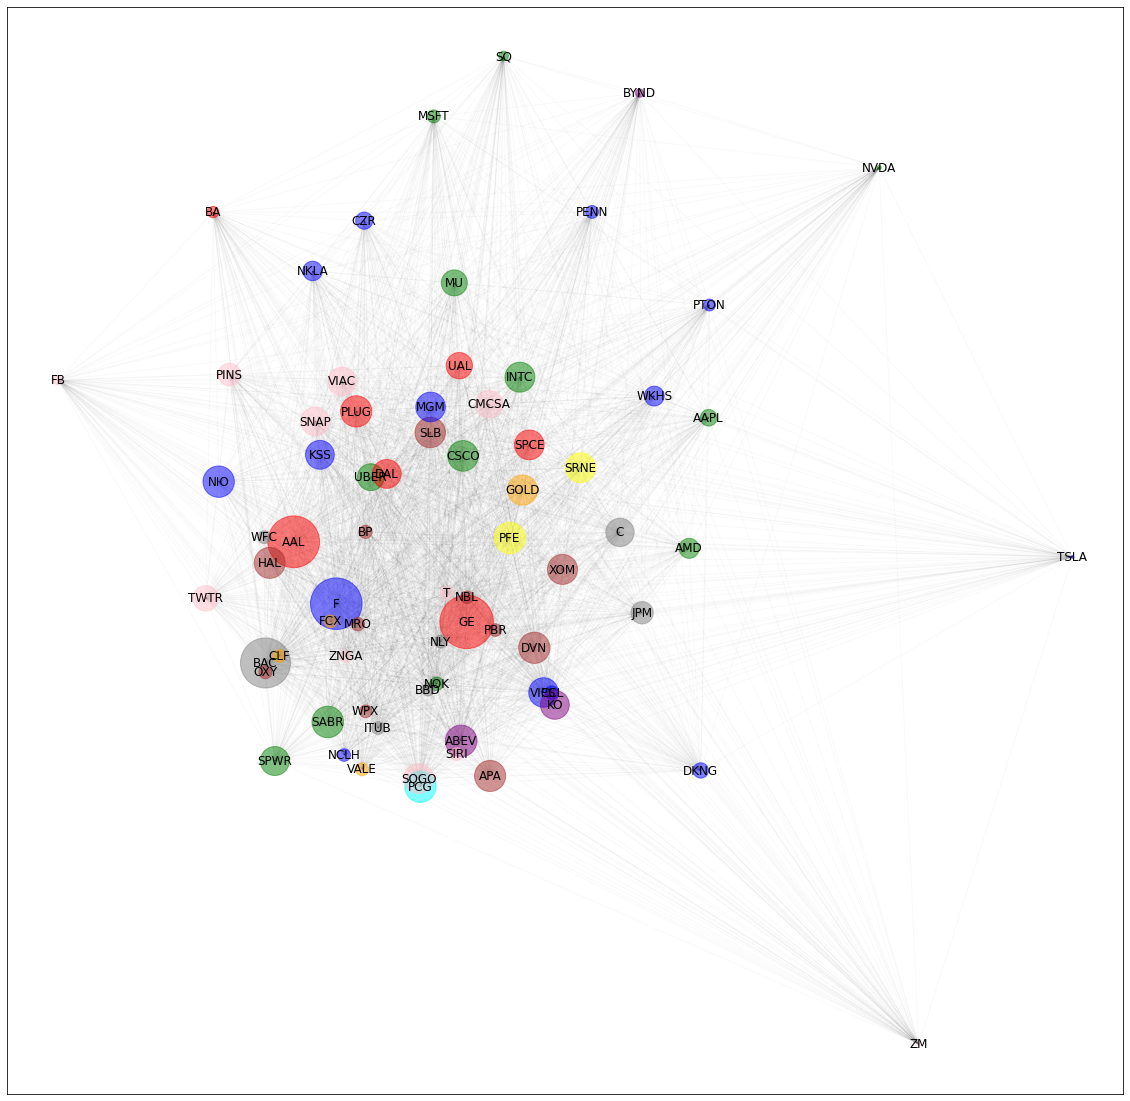

In [700]:
G
plt.figure(3,figsize=(20,20))

pos=nx.spring_layout(G)

nodes = nx.draw_networkx_nodes(G, pos,node_size=size_map,node_color=color_map,alpha=0.5)

labels = nx.draw_networkx_labels(G, pos)

edges = nx.draw_networkx_edges(G, pos,alpha=0.01)

arcs = nx.draw_networkx_edges(G, pos,alpha=0.01)